#### Borsa Veri Seti
* Date : Tarih
* Symbol : Sembol  
* Series : Güvenlik Türü
* Prev Close : Önceki Günün Kapanış Fiyatı
* Open : Günün Açılış Fiyatı
* High : Günün En Yüksek Fiyatı
* Low : Günün En Düşük Fiyatı
* Last : Gün İçindeki Son İşlem Fiyatı
* Close : Günün Kapanış Fiyatı
* VWAP : Hacim Ağırlıklı Ortalama Fiyat

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
veriSeti=pd.read_excel(r"C:\Users\beyza\Desktop\FirdesBeyzanurSenocak_20040718015\ExcelVerileri\borsa.xlsx")
veriSeti=veriSeti[['Date','Symbol','Series','Prev Close','Open','High','Low','Last','Close','VWAP']]
fbs = veriSeti.copy()
veriSeti.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP
0,2007-11-27,MUNDRAPORT,EQ,4400,7700,10500,7700,9590,9629,98472
1,2007-11-28,MUNDRAPORT,EQ,9629,9840,9900,8740,8850,8939,94138
2,2007-11-29,MUNDRAPORT,EQ,8939,9090,91475,8410,8870,8842,88809
3,2007-11-30,MUNDRAPORT,EQ,8842,8900,9580,8900,9290,92155,92917
4,2007-12-03,MUNDRAPORT,EQ,92155,93975,9950,9220,9800,9693,96565


In [4]:
yeniİsimlendirmeler = ['Tarih','Sembol','GuvenlikTuru','OncekiGununKapanisFiyati','AcilisFiyati','EnYuksekFiyat',
                       'EnDusukFiyat','SonIslemFiyati','KapanisFiyati','VWAP']
veriSeti.columns = yeniİsimlendirmeler
veriSeti.head()

,Tarih,Sembol,GuvenlikTuru,OncekiGununKapanisFiyati,AcilisFiyati,EnYuksekFiyat,EnDusukFiyat,SonIslemFiyati,KapanisFiyati,VWAP
0,2007-11-27,MUNDRAPORT,EQ,4400,7700,10500,7700,9590,9629,98472
1,2007-11-28,MUNDRAPORT,EQ,9629,9840,9900,8740,8850,8939,94138
2,2007-11-29,MUNDRAPORT,EQ,8939,9090,91475,8410,8870,8842,88809
3,2007-11-30,MUNDRAPORT,EQ,8842,8900,9580,8900,9290,92155,92917
4,2007-12-03,MUNDRAPORT,EQ,92155,93975,9950,9220,9800,9693,96565


In [5]:
veriSeti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tarih                     3322 non-null   datetime64[ns]
 1   Sembol                    3322 non-null   object        
 2   GuvenlikTuru              3322 non-null   object        
 3   OncekiGununKapanisFiyati  3322 non-null   int64         
 4   AcilisFiyati              3322 non-null   int64         
 5   EnYuksekFiyat             3322 non-null   int64         
 6   EnDusukFiyat              3322 non-null   int64         
 7   SonIslemFiyati            3322 non-null   int64         
 8   KapanisFiyati             3322 non-null   int64         
 9   VWAP                      3322 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 259.7+ KB


#### Tarih verimizi gün-ay ve yıl olarak ayırdık.

In [6]:
import datetime
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in veriSeti['Tarih']]
veriSeti['Tarih'] = pd.DataFrame({'Tarih':sorteddates})
veriSeti['Yıl'], veriSeti['Ay'],  veriSeti['Gun'] = veriSeti['Tarih'].str.split('-').str
veriSeti.head(10)

,Tarih,Sembol,GuvenlikTuru,OncekiGununKapanisFiyati,AcilisFiyati,EnYuksekFiyat,EnDusukFiyat,SonIslemFiyati,KapanisFiyati,VWAP,Yıl,Ay,Gun
0,2007-11-27,MUNDRAPORT,EQ,4400,7700,10500,7700,9590,9629,98472,2007,11,27
1,2007-11-28,MUNDRAPORT,EQ,9629,9840,9900,8740,8850,8939,94138,2007,11,28
2,2007-11-29,MUNDRAPORT,EQ,8939,9090,91475,8410,8870,8842,88809,2007,11,29
3,2007-11-30,MUNDRAPORT,EQ,8842,8900,9580,8900,9290,92155,92917,2007,11,30
4,2007-12-03,MUNDRAPORT,EQ,92155,93975,9950,9220,9800,9693,96565,2007,12,03
5,2007-12-04,MUNDRAPORT,EQ,9693,9850,10560,9760,10490,104145,101539,2007,12,04
6,2007-12-05,MUNDRAPORT,EQ,104145,10610,10995,10500,10840,108245,108279,2007,12,05
7,2007-12-06,MUNDRAPORT,EQ,108245,10890,11097,10510,10901,10813,108703,2007,12,06
8,2007-12-07,MUNDRAPORT,EQ,10813,11000,11340,10780,11000,11024,110657,2007,12,07
9,2007-12-10,MUNDRAPORT,EQ,11024,11100,11100,10611,107355,10754,108038,2007,12,10


In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#### Verilerimizi görselleştirdik.

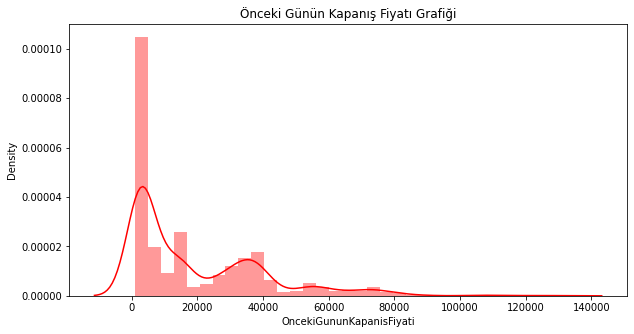

In [8]:
plt.figure(figsize=(10,5))
plt.title("Önceki Günün Kapanış Fiyatı Grafiği")
ax = sns.distplot(veriSeti["OncekiGununKapanisFiyati"], color = 'r')

<AxesSubplot:title={'center':'Önceki Günün Kapanış Fiyatının Violin Grafiği'}, xlabel='OncekiGununKapanisFiyati'>

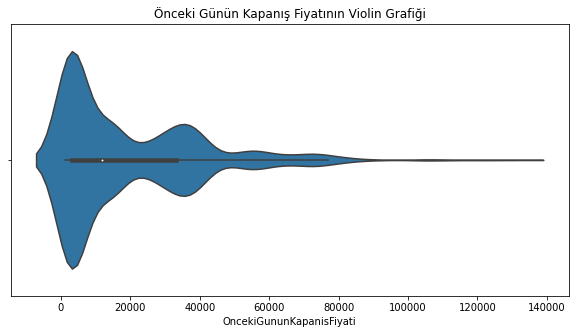

In [9]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("Önceki Günün Kapanış Fiyatının Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['OncekiGununKapanisFiyati']).OncekiGununKapanisFiyati)

Text(0.5, 1.0, 'Önceki Günün Kapanış Fiyatının Tarihe Oranı')

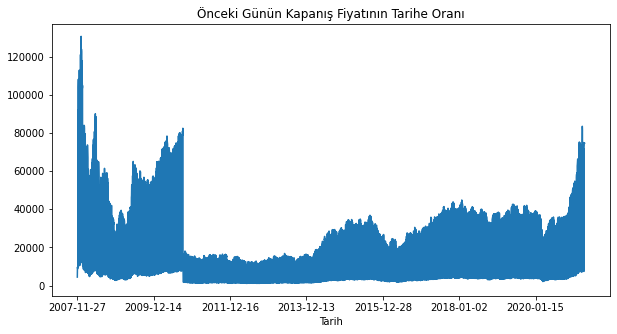

In [10]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['OncekiGununKapanisFiyati'].plot(x=veriSeti.Tarih)
plt.title("Önceki Günün Kapanış Fiyatının Tarihe Oranı")

Text(0.5, 1.0, 'Önceki Günün Kapanış Fiyatının Aylara Oranı')

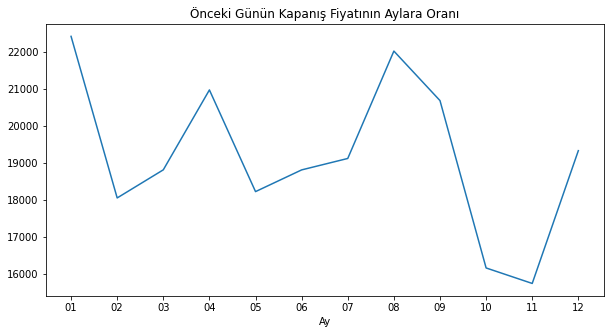

In [11]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13))
tarihGrubu['OncekiGununKapanisFiyati'].plot(x=veriSeti.Ay)
plt.title("Önceki Günün Kapanış Fiyatının Aylara Oranı")

Text(0.5, 1.0, 'Önceki Günün Kapanış Fiyatının Günlere Oranı')

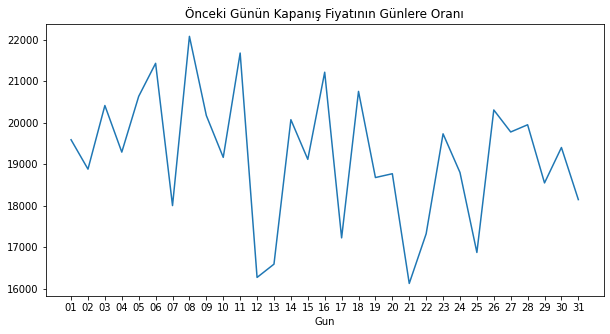

In [12]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['OncekiGununKapanisFiyati'].plot(x=veriSeti.Gun)
plt.title("Önceki Günün Kapanış Fiyatının Günlere Oranı")

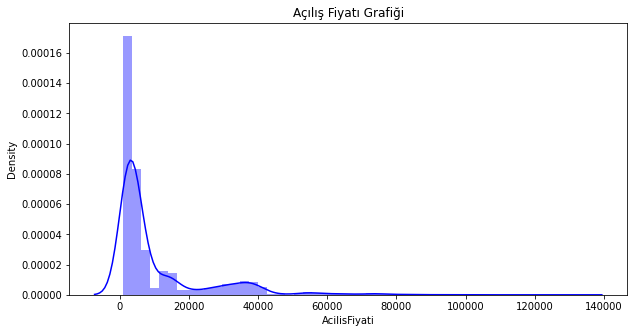

In [13]:
plt.figure(figsize=(10,5))
plt.title("Açılış Fiyatı Grafiği")
ax = sns.distplot(veriSeti["AcilisFiyati"], color = 'b')

<AxesSubplot:title={'center':'Açılış Fiyatının Violin Grafiği'}, xlabel='AcilisFiyati'>

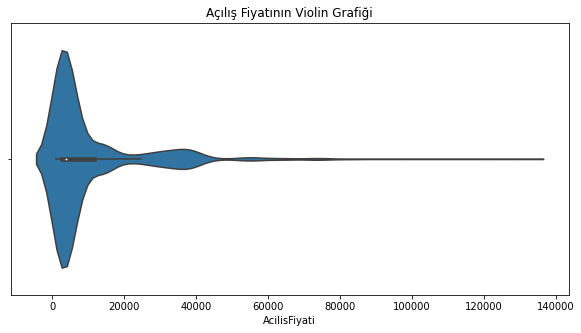

In [14]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("Açılış Fiyatının Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['AcilisFiyati']).AcilisFiyati)

Text(0.5, 1.0, 'Açılış Fiyatının Tarihe Oranı')

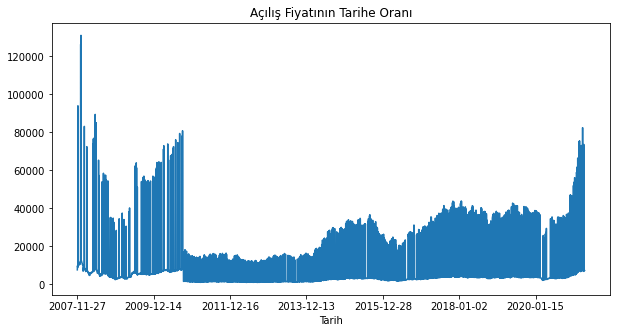

In [15]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['AcilisFiyati'].plot(x=veriSeti.Tarih)
plt.title("Açılış Fiyatının Tarihe Oranı")

Text(0.5, 1.0, 'Açılış Fiyatının Aylara Oranı')

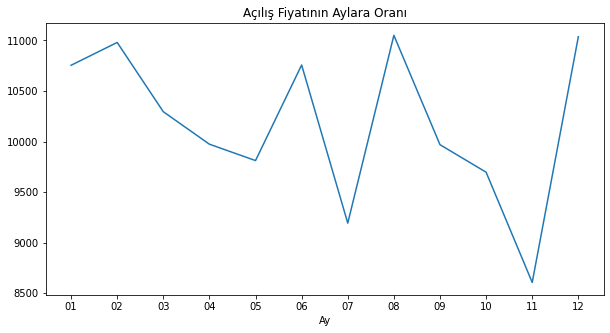

In [16]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) 
tarihGrubu['AcilisFiyati'].plot(x=veriSeti.Ay)
plt.title("Açılış Fiyatının Aylara Oranı")

Text(0.5, 1.0, 'Açılış Fiyatının Fiyatının Günlere Oranı')

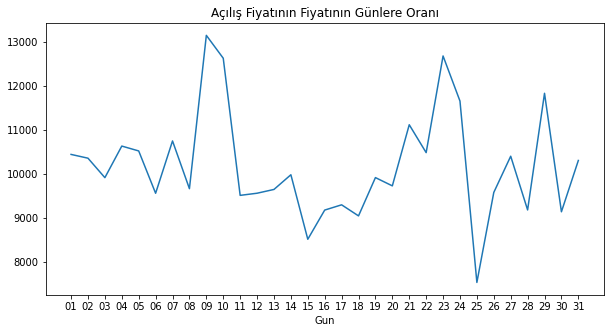

In [17]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['AcilisFiyati'].plot(x=veriSeti.Gun)
plt.title("Açılış Fiyatının Fiyatının Günlere Oranı")

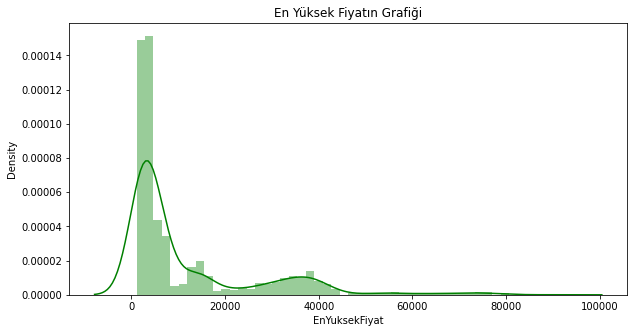

In [18]:
plt.figure(figsize=(10,5))
plt.title("En Yüksek Fiyatın Grafiği")
ax = sns.distplot(veriSeti["EnYuksekFiyat"], color = 'g')

<AxesSubplot:title={'center':'En Yüksek Fiyatın Violin Grafiği'}, xlabel='EnYuksekFiyat'>

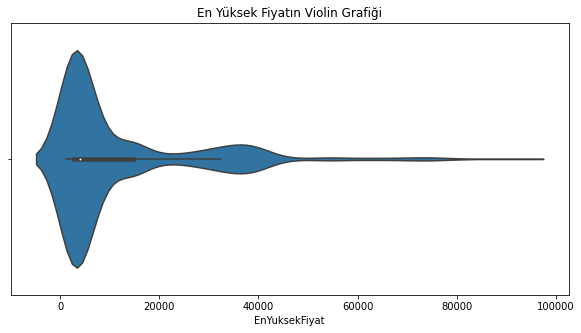

In [19]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("En Yüksek Fiyatın Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['EnYuksekFiyat']).EnYuksekFiyat)

Text(0.5, 1.0, 'En Yüksek Fiyatın Tarihe Oranı')

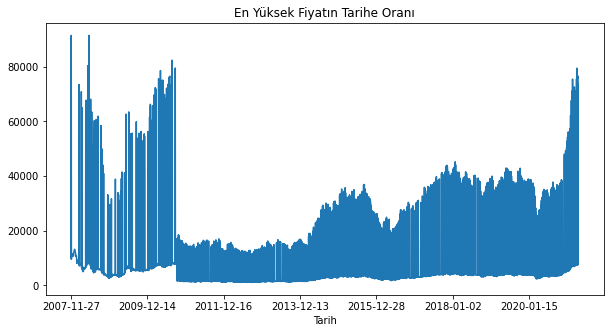

In [20]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['EnYuksekFiyat'].plot(x=veriSeti.Tarih)
plt.title("En Yüksek Fiyatın Tarihe Oranı")

Text(0.5, 1.0, 'En Yüksek Fiyatın Aylara Oranı')

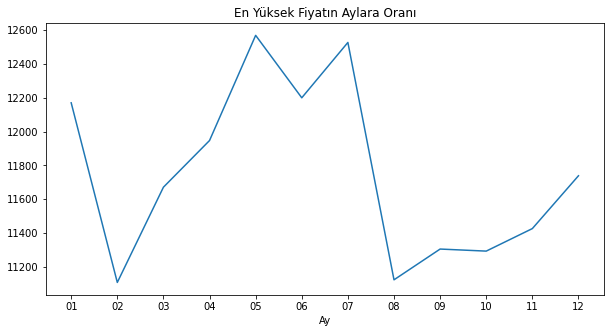

In [21]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13))
tarihGrubu['EnYuksekFiyat'].plot(x=veriSeti.Ay)
plt.title("En Yüksek Fiyatın Aylara Oranı")

Text(0.5, 1.0, 'En Yüksek Fiyatın Günlere Oranı')

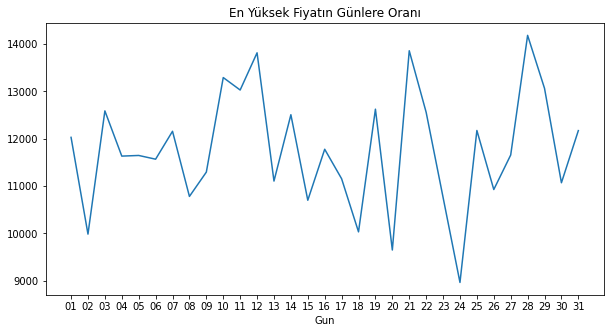

In [22]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['EnYuksekFiyat'].plot(x=veriSeti.Gun)
plt.title("En Yüksek Fiyatın Günlere Oranı")

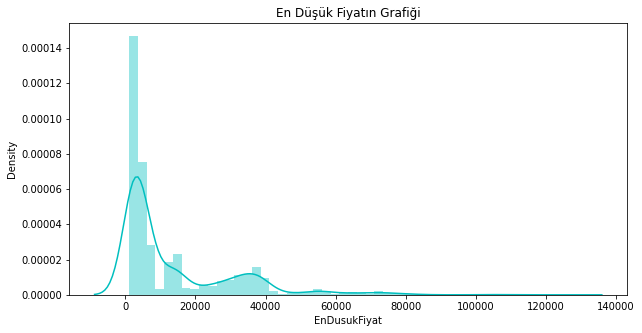

In [23]:
plt.figure(figsize=(10,5))
plt.title("En Düşük Fiyatın Grafiği")
ax = sns.distplot(veriSeti["EnDusukFiyat"], color = 'c')

<AxesSubplot:title={'center':'En Düşük Fiyatın Violin Grafiği'}, xlabel='EnDusukFiyat'>

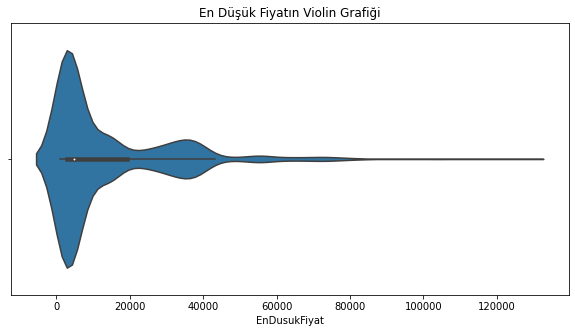

In [24]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("En Düşük Fiyatın Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['EnDusukFiyat']).EnDusukFiyat)

Text(0.5, 1.0, 'En Düşük Fiyatın Tarihe Oranı')

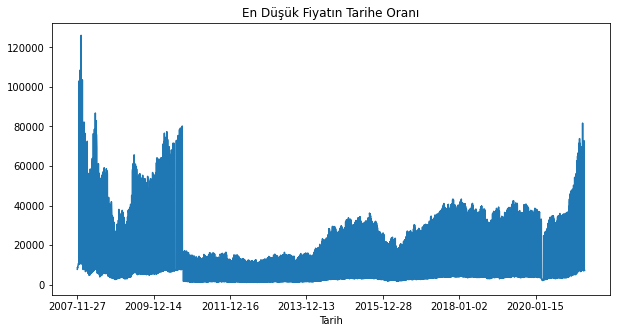

In [25]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['EnDusukFiyat'].plot(x=veriSeti.Tarih)
plt.title("En Düşük Fiyatın Tarihe Oranı")

Text(0.5, 1.0, 'En Düşük Fiyatın Aylara Oranı')

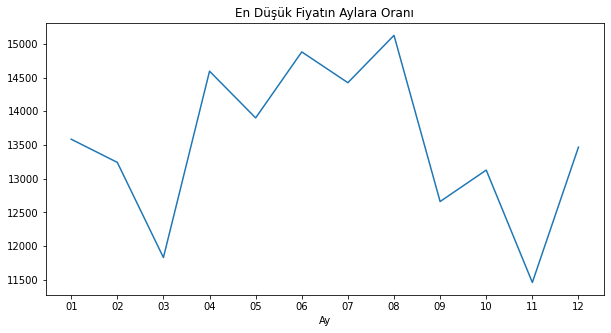

In [26]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) 
tarihGrubu['EnDusukFiyat'].plot(x=veriSeti.Ay)
plt.title("En Düşük Fiyatın Aylara Oranı")

Text(0.5, 1.0, 'En Düşük Fiyatın Günlere Oranı')

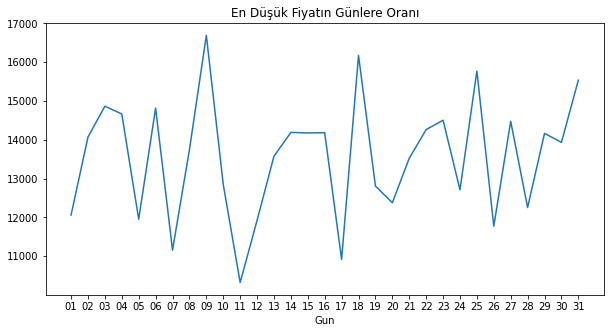

In [27]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['EnDusukFiyat'].plot(x=veriSeti.Gun)
plt.title("En Düşük Fiyatın Günlere Oranı")

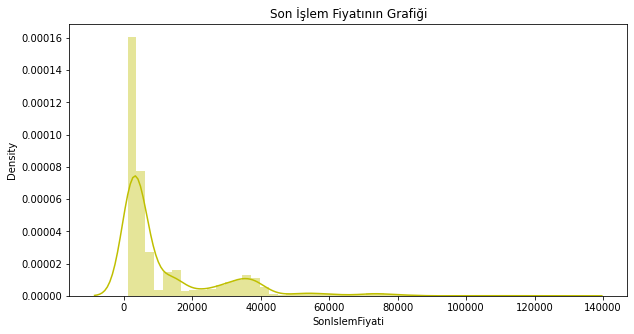

In [28]:
plt.figure(figsize=(10,5))
plt.title("Son İşlem Fiyatının Grafiği")
ax = sns.distplot(veriSeti["SonIslemFiyati"], color = 'y')

<AxesSubplot:title={'center':'Son İşlem Fiyatının Violin Grafiği'}, xlabel='SonIslemFiyati'>

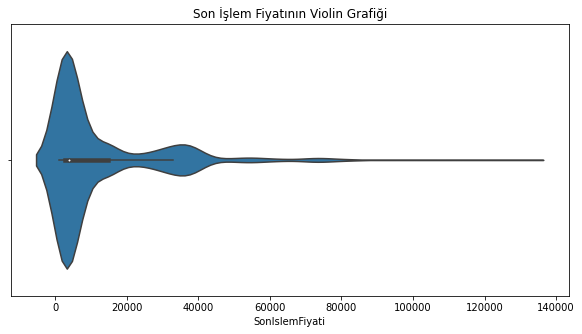

In [29]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("Son İşlem Fiyatının Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['SonIslemFiyati']).SonIslemFiyati)

Text(0.5, 1.0, 'Son İşlem Fiyatının Tarihe Oranı')

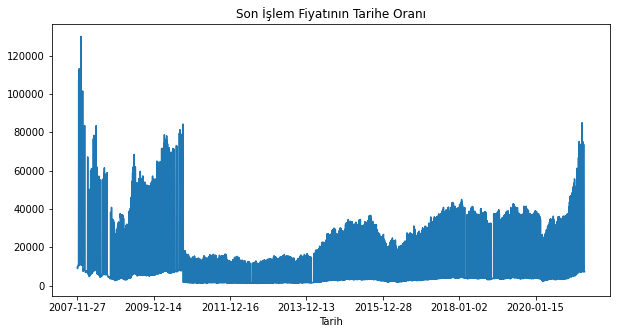

In [30]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['SonIslemFiyati'].plot(x=veriSeti.Tarih)
plt.title("Son İşlem Fiyatının Tarihe Oranı")

Text(0.5, 1.0, 'Son İşlem Fiyatının Aylara Oranı')

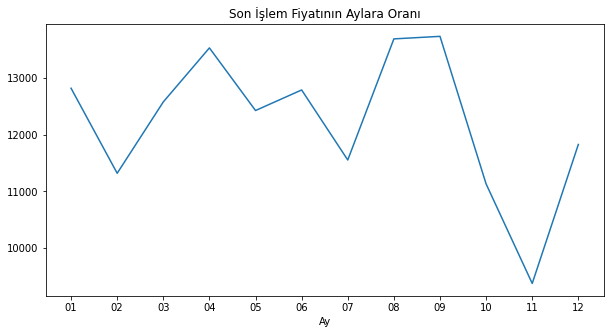

In [31]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13))
tarihGrubu['SonIslemFiyati'].plot(x=veriSeti.Ay)
plt.title("Son İşlem Fiyatının Aylara Oranı")

Text(0.5, 1.0, 'Son İşlem Fiyatının Günlere Oranı')

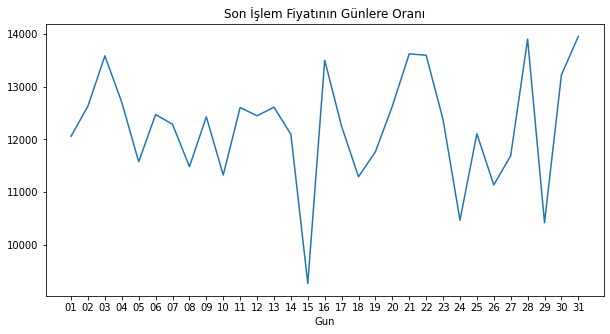

In [32]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31))
tarihGrubu['SonIslemFiyati'].plot(x=veriSeti.Gun)
plt.title("Son İşlem Fiyatının Günlere Oranı")

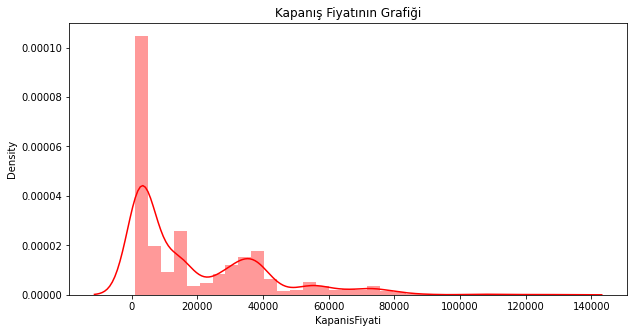

In [33]:
plt.figure(figsize=(10,5))
plt.title("Kapanış Fiyatının Grafiği")
ax = sns.distplot(veriSeti["KapanisFiyati"], color = 'r')

<AxesSubplot:title={'center':'Kapanış Fiyatının Violin Grafiği'}, xlabel='KapanisFiyati'>

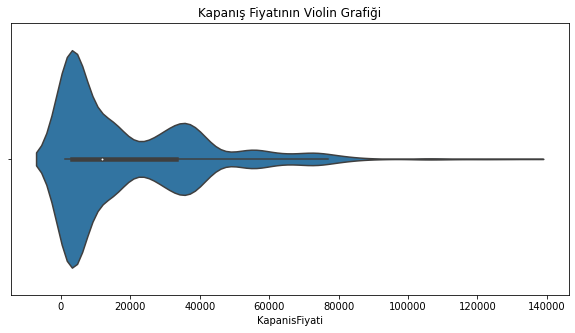

In [34]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("Kapanış Fiyatının Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['KapanisFiyati']).KapanisFiyati)

Text(0.5, 1.0, 'Kapanış Fiyatının Tarihe Oranı')

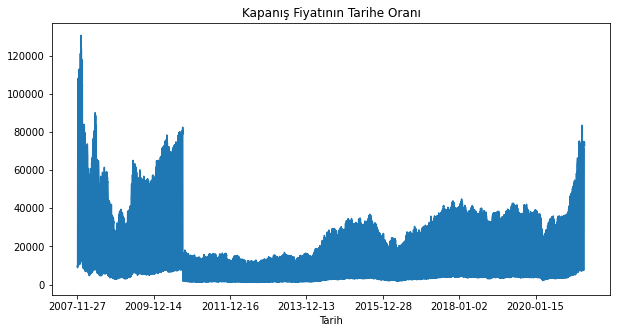

In [35]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['KapanisFiyati'].plot(x=veriSeti.Tarih)
plt.title("Kapanış Fiyatının Tarihe Oranı")

Text(0.5, 1.0, 'Kapanış Fiyatının Aylara Oranı')

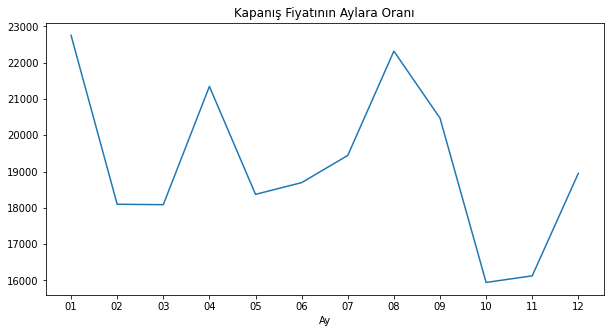

In [36]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) 
tarihGrubu['KapanisFiyati'].plot(x=veriSeti.Ay)
plt.title("Kapanış Fiyatının Aylara Oranı")

Text(0.5, 1.0, 'Kapanış Fiyatının Günlere Oranı')

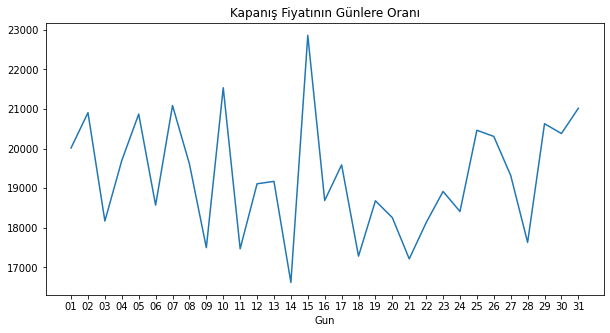

In [37]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['KapanisFiyati'].plot(x=veriSeti.Gun)
plt.title("Kapanış Fiyatının Günlere Oranı")

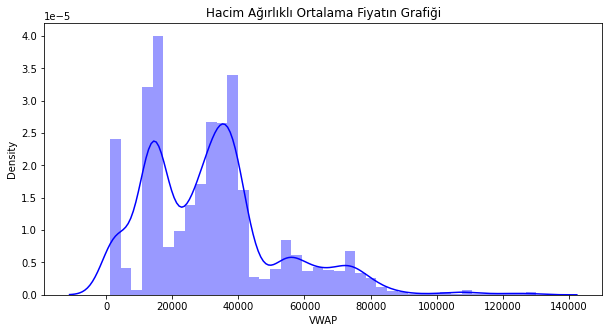

In [38]:
plt.figure(figsize=(10,5))
plt.title("Hacim Ağırlıklı Ortalama Fiyatın Grafiği")
ax = sns.distplot(veriSeti["VWAP"], color = 'b')

<AxesSubplot:title={'center':'Hacim Ağırlıklı Ortalama Fiyatın Violin Grafiği'}, xlabel='VWAP'>

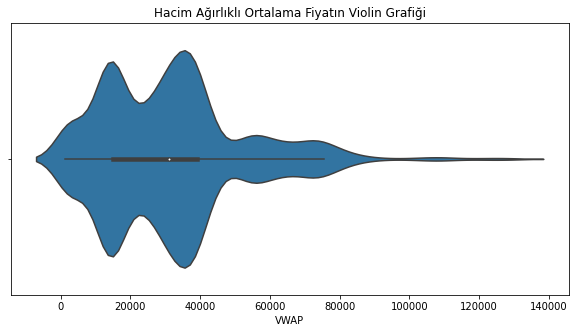

In [39]:
sekil, ax = plt.subplots()
sekil.set_size_inches(10,5)
plt.title("Hacim Ağırlıklı Ortalama Fiyatın Violin Grafiği")
sns.violinplot(veriSeti.dropna(subset = ['VWAP']).VWAP)

Text(0.5, 1.0, 'Hacim Ağırlıklı Ortalama Fiyatın Tarihe Oranı')

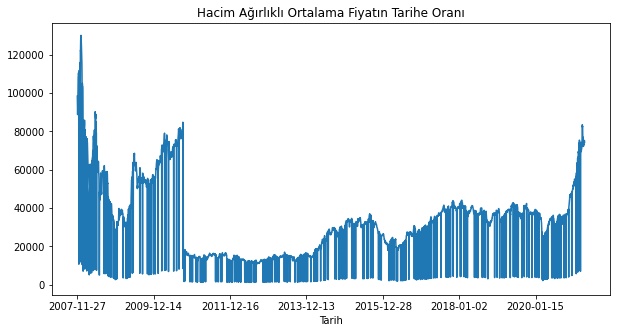

In [40]:
tarihGrubu=veriSeti.groupby('Tarih').mean()
plt.figure(figsize=(10,5))
tarihGrubu['VWAP'].plot(x=veriSeti.Tarih)
plt.title("Hacim Ağırlıklı Ortalama Fiyatın Tarihe Oranı")

Text(0.5, 1.0, 'Hacim Ağırlıklı Ortalama Fiyatın Aylara Oranı')

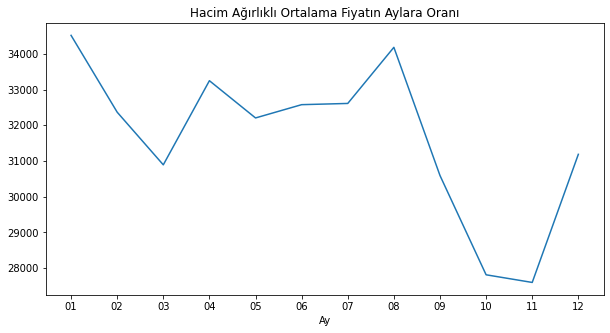

In [41]:
tarihGrubu=veriSeti.groupby('Ay').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,13)) 
tarihGrubu['VWAP'].plot(x=veriSeti.Ay)
plt.title("Hacim Ağırlıklı Ortalama Fiyatın Aylara Oranı")

Text(0.5, 1.0, 'Hacim Ağırlıklı Ortalama Fiyatın Günlere Oranı')

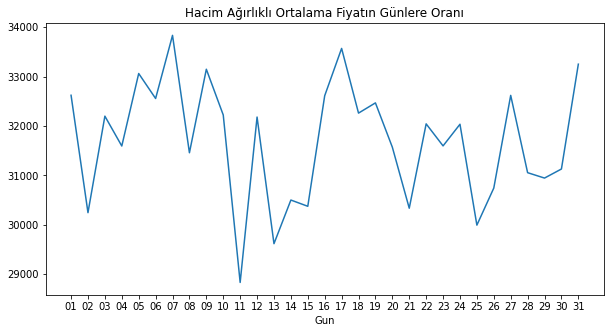

In [42]:
tarihGrubu=veriSeti.groupby('Gun').mean()
sekil, ax = plt.subplots(figsize=(10,5))
ax.xaxis.set(ticks=range(0,31)) 
tarihGrubu['VWAP'].plot(x=veriSeti.Gun)
plt.title("Hacim Ağırlıklı Ortalama Fiyatın Günlere Oranı")

ADANIPORTS    2299
MUNDRAPORT    1023
Name: Sembol, dtype: int64


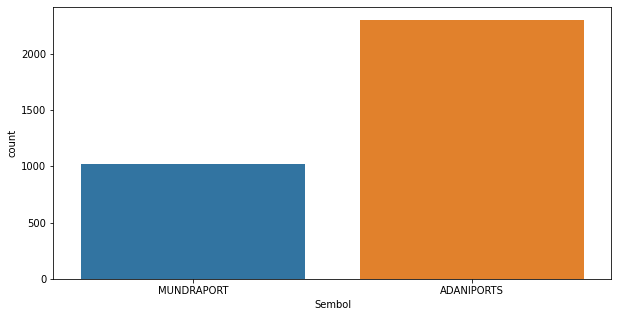

In [43]:
print(veriSeti['Sembol'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(veriSeti['Sembol'])
plt.show()

In [44]:
conda install -c conda-forge prophet

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [47]:
from fbprophet import Prophet

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
veriSetiZaman = veriSeti.loc[:, ["Tarih","OncekiGununKapanisFiyati"]]
veriSetiZaman['Tarih'] = pd.DatetimeIndex(veriSetiZaman['Tarih'])
veriSetiZaman.dtypes

Tarih                       datetime64[ns]
OncekiGununKapanisFiyati             int64
dtype: object

In [50]:
veriSetiZaman = veriSeti.rename(columns={'Tarih': 'ds', 'OncekiGununKapanisFiyati': 'y' })

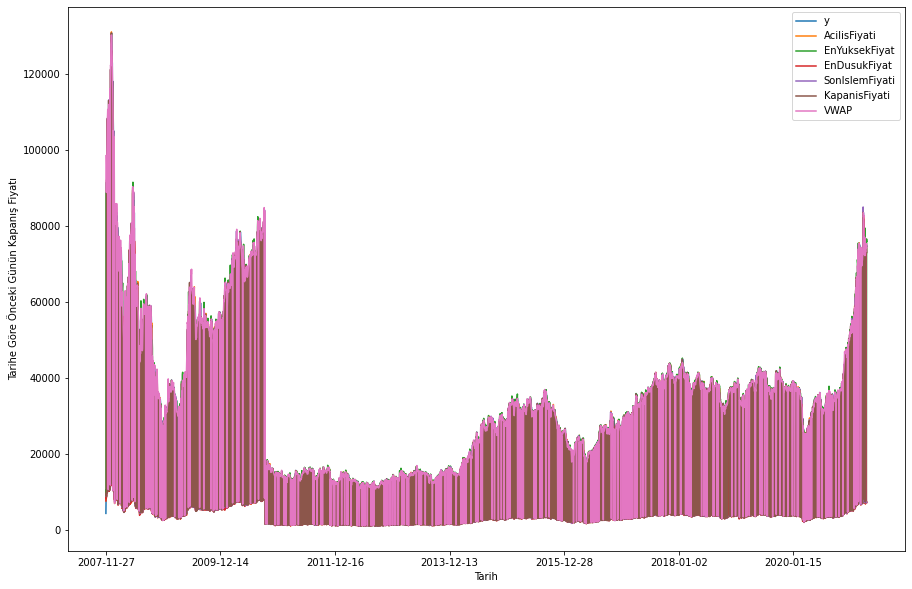

In [51]:
ax = veriSetiZaman.set_index('ds').plot(figsize=(15, 10))
ax.set_ylabel('Tarihe Göre Önceki Günün Kapanış Fiyatı')
ax.set_xlabel('Tarih')
plt.show()

In [52]:
model = Prophet()
model.fit(veriSetiZaman)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
tarihler = model.make_future_dataframe(periods=365)
tahmin =model.predict(tarihler)

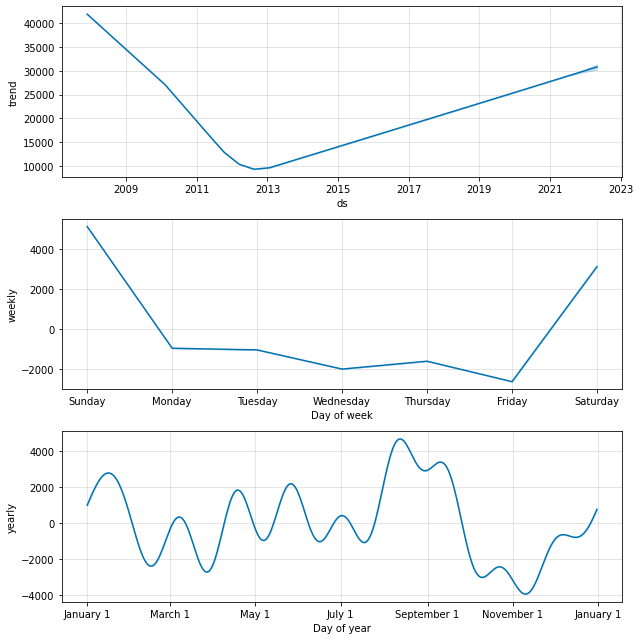

In [54]:
sekil2 = model.plot_components(tahmin)

In [55]:
yeniTahmin = tahmin['ds']
yeniTahmin2 = tahmin['yhat']

yeniTahmin = pd.concat([yeniTahmin,yeniTahmin2], axis=1)

maske = (yeniTahmin['ds'] > "2014.12.30") & (yeniTahmin['ds'] <= "2021.04.30")
tahminEdilen = yeniTahmin.loc[maske]

maske = (yeniTahmin['ds'] > "2007.11.27") & (yeniTahmin['ds'] <= "2014.12.31")
yeniTahmin = yeniTahmin.loc[maske]

Kırmızı = Tahmini Değerler, Mavi = Ana Değerler


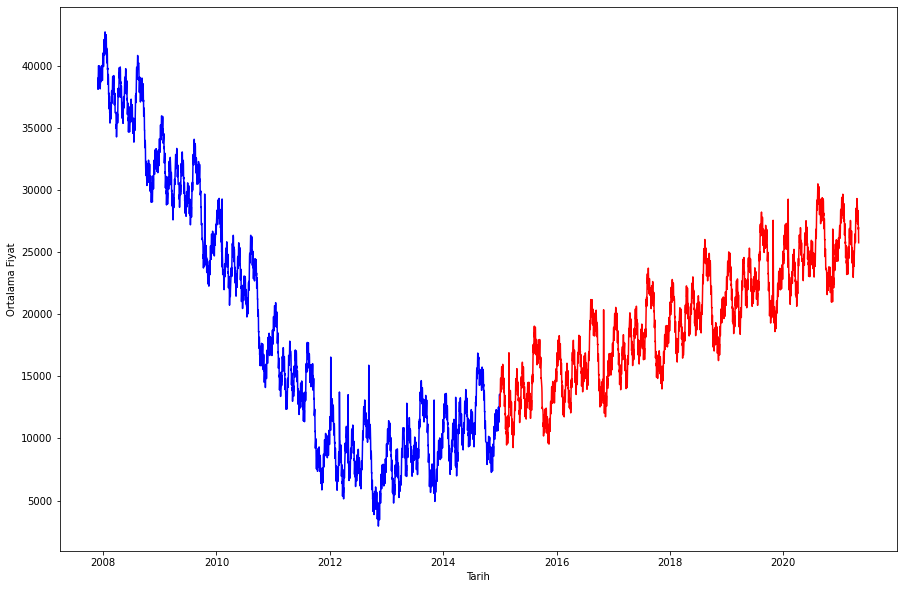

In [56]:
sekil, ax1 = plt.subplots(figsize=(15, 10))
ax1.plot(yeniTahmin.set_index('ds'), color='b')
ax1.plot(tahminEdilen.set_index('ds'), color='r')
ax1.set_ylabel('Ortalama Fiyat')
ax1.set_xlabel('Tarih')
print("Kırmızı = Tahmini Değerler, Mavi = Ana Değerler")

In [57]:
veriSeti1=veriSeti.reset_index()['KapanisFiyati']

In [58]:
veri = veriSeti.filter(['KapanisFiyati'])
veri_seti = veri.values
calisilanveriuzunlugu = int(np.ceil( len(veri_seti) * .95 ))
calisilanveriuzunlugu

3156

In [59]:
from sklearn.preprocessing import MinMaxScaler
olcek = MinMaxScaler(feature_range=(0,1))
olcek_veri = olcek.fit_transform(veri_seti)
olcek_veri

array([[0.06593144],
       [0.06061003],
       [0.05986195],
       ...,
       [0.56719238],
       [0.56757799],
       [0.55469865]])

In [60]:
calisilanveri = olcek_veri[0:int(calisilanveriuzunlugu), :]

XDizisi = []
YDizisi = []

for i in range(60, len(calisilanveri)):
    XDizisi.append(calisilanveri[i-60:i, 0])
    YDizisi.append(calisilanveri[i, 0])
    if i<= 61:
        print(XDizisi)
        print(YDizisi)
        print()
XDizisi, YDizisi = np.array(XDizisi), np.array(YDizisi)
XDizisi = np.reshape(XDizisi, (XDizisi.shape[0], XDizisi.shape[1], 1))


[array([0.06593144, 0.06061003, 0.05986195, 0.70238692, 0.06642502,
       0.79485598, 0.82647592, 0.07506266, 0.07668993, 0.07460764,
       0.79963753, 0.07163074, 0.86310878, 0.07731462, 0.79701539,
       0.82069178, 0.07395211, 0.07343539, 0.08088536, 0.08420931,
       0.9261173 , 0.0880037 , 0.089523  , 0.99182509, 1.        ,
       0.09006285, 0.94825126, 0.93814831, 0.08458721, 0.90190105,
       0.85663055, 0.82909806, 0.7899973 , 0.80110284, 0.07113716,
       0.0704045 , 0.0683762 , 0.62796437, 0.55894035, 0.05776424,
       0.61955809, 0.0584352 , 0.05497243, 0.64007249, 0.63212895,
       0.63768172, 0.62819574, 0.05769483, 0.05601357, 0.05394671,
       0.60575329, 0.59634443, 0.04651988, 0.04421394, 0.50911965,
       0.04641191, 0.55369606, 0.05117804, 0.0505842 , 0.04813172])]
[0.04855589403462769]

[array([0.06593144, 0.06061003, 0.05986195, 0.70238692, 0.06642502,
       0.79485598, 0.82647592, 0.07506266, 0.07668993, 0.07460764,
       0.79963753, 0.07163074, 0.86

#### LSTM tahminleme yaptık.

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (XDizisi.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(XDizisi, YDizisi, batch_size=1, epochs=1)

3096/3096 [==============================] - 53s 15ms/step - loss: 0.0190


In [62]:
test_veri = olcek_veri[calisilanveriuzunlugu - 60: , :]
XTest = []
YTest = veri_seti[calisilanveriuzunlugu:, :]
for i in range(60, len(test_veri)) : XTest.append(test_veri[i-60:i, 0])
XTest = np.array(XTest)
XTest = np.reshape(XTest, (XTest.shape[0], XTest.shape[1], 1 ))
tahminler = model.predict(XTest)
tahminler = olcek.inverse_transform(tahminler)
rmse = np.sqrt(np.mean(((tahminler - YTest) ** 2)))
rmse

24501.800494631225

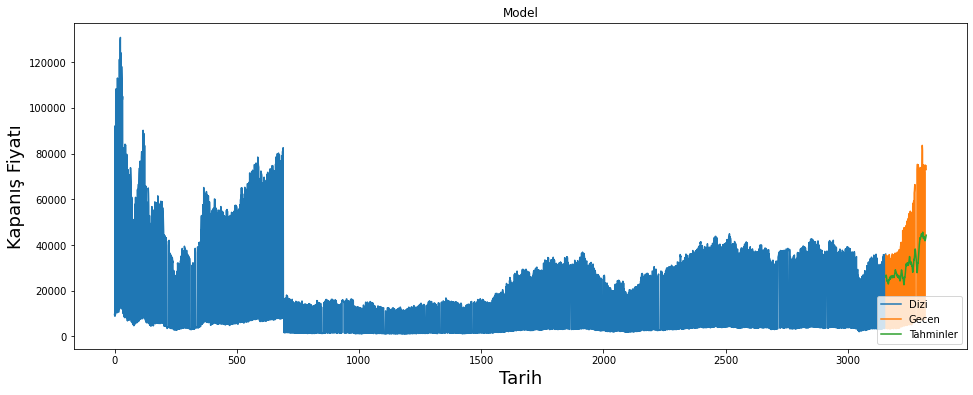

In [63]:
dizi = veri[:calisilanveriuzunlugu]
gecen = veri[calisilanveriuzunlugu:]
gecen['Tahminler'] = tahminler
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Kapanış Fiyatı', fontsize=18)
plt.plot(dizi['KapanisFiyati'])
plt.plot(gecen[['KapanisFiyati', 'Tahminler']])
plt.legend(['Dizi', 'Gecen', 'Tahminler'], loc='lower right')
plt.show()

#### Regresyon tahminlemesini yaptık.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [65]:
x = veriSeti.index
y = veriSeti['KapanisFiyati']
y

0        9629
1        8939
2        8842
3       92155
4        9693
        ...  
3317    73075
3318    74915
3319    74625
3320    74675
3321    73005
Name: KapanisFiyati, Length: 3322, dtype: int64

In [66]:
def veriSeti_plot(veri, x, y, title="", xlabel='Tarih', ylabel='Değerler', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

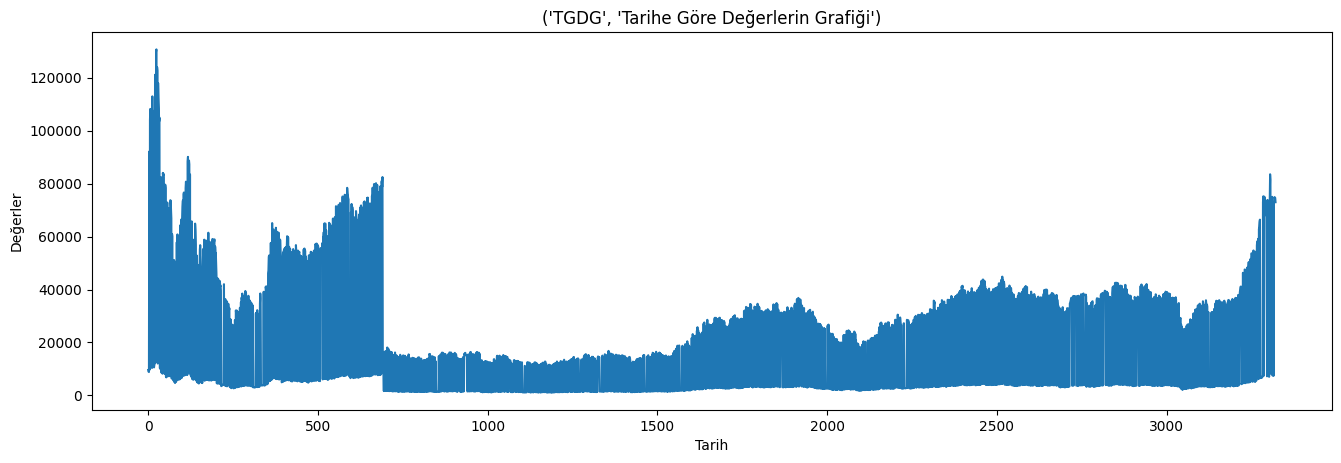

In [67]:
ad= "TGDG"
title = (ad,"Tarihe Göre Değerlerin Grafiği")
veriSeti_plot(veriSeti , x , y , title=title,xlabel='Tarih', ylabel='Değerler',dpi=100)

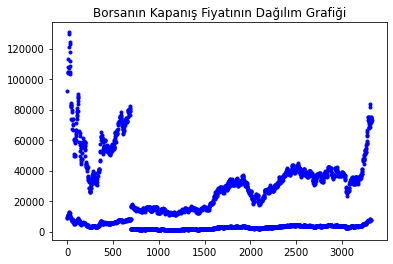

In [68]:
veriSeti_KapanisFiyati = veriSeti['KapanisFiyati']
veriSeti_KapanisFiyati.plot(style='b.')
plt.title('Borsanın Kapanış Fiyatının Dağılım Grafiği')
plt.show()

In [69]:
!pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'D:\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



<AxesSubplot:ylabel='Density'>

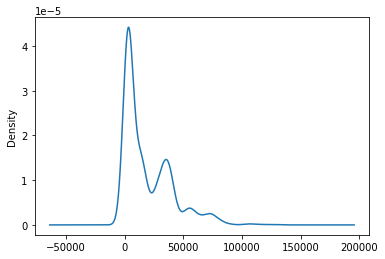

In [70]:
veriSeti['KapanisFiyati'].plot(kind='kde')

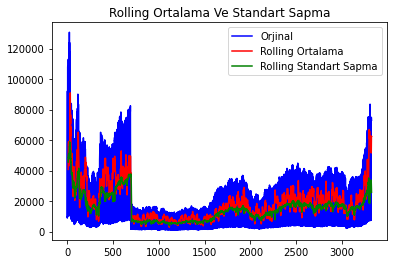

Test Sonuçları
Test İstatistiği        -3.428737
Kapanış Fiyatı           0.010017
Gecikme Sayısı          25.000000
Gözlem Sayısı         3296.000000
kritik değer (1%)       -3.432336
kritik değer (5%)       -2.862417
kritik değer (10%)      -2.567237
dtype: float64


<Figure size 1440x720 with 0 Axes>

In [71]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(zamanSerisi):
   
    rolOrtalama = zamanSerisi.rolling(12).mean()
    rolStandartSapma = zamanSerisi.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(zamanSerisi, color='blue',label='Orjinal')
    plt.plot(rolOrtalama, color='red', label='Rolling Ortalama')
    plt.plot(rolStandartSapma, color='green', label = 'Rolling Standart Sapma')
    plt.legend(loc='best')
    plt.title('Rolling Ortalama Ve Standart Sapma')
    plt.show(block=False)
    plt.figure(figsize=(20,10))
    
    print("Test Sonuçları")
    adft = adfuller(zamanSerisi,autolag='AIC')

    output = pd.Series(adft[0:4],index=['Test İstatistiği','Kapanış Fiyatı','Gecikme Sayısı','Gözlem Sayısı'])
    for key,values in adft[4].items():
        output['kritik değer (%s)'%key] =  values
    print(output)
    
test_stationarity(veriSeti['KapanisFiyati'])

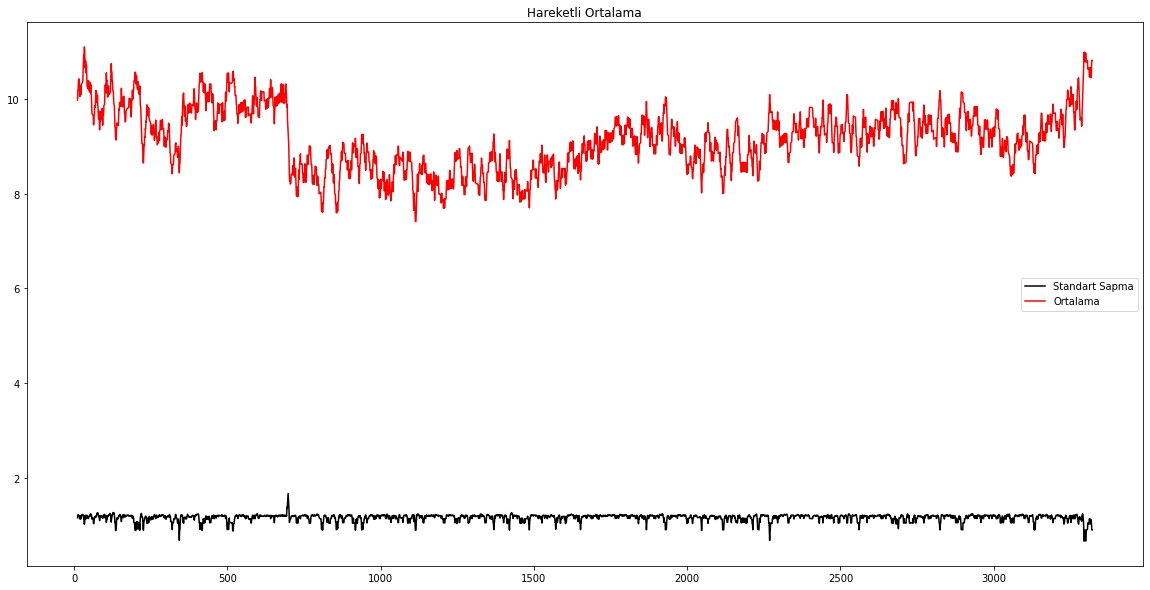

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
veriSeti_log = np.log(veriSeti['KapanisFiyati'])
hareketliort = veriSeti_log.rolling(12).mean()
std_dev = veriSeti_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Hareketli Ortalama')
plt.plot(std_dev, color ="black", label = "Standart Sapma")
plt.plot(hareketliort, color="red", label = "Ortalama")
plt.legend()
plt.show()

#### ARIMA modeli.

In [73]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [74]:
train_data, test_data = veriSeti_log[3:int(len(veriSeti_log)*0.9)], veriSeti_log[int(len(veriSeti_log)*0.9):]
modelotomatikARIMA = auto_arima(train_data, start_p=0, start_q=0,max_p=3,max_q=3, m=1,d=None,seasonal=False,start_P=0,D=0,trace=True,
error_action='ignore',suppress_warnings=True,stepwise=True)
print(modelotomatikARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11431.351, Time=1.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10582.946, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9428.318, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11429.351, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9429.810, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9429.791, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9431.940, Time=0.73 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=9426.529, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9428.018, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9427.999, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10580.946, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9430.077, Time=0.58 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 6.971 seconds
                               SARIMAX Results                                
Dep. 

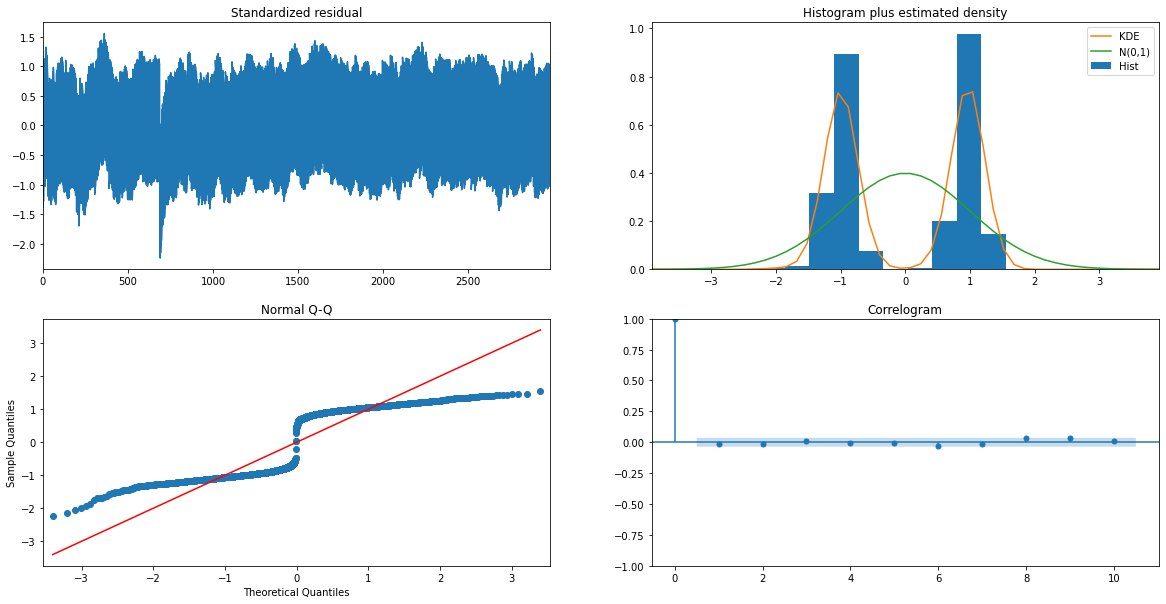

In [75]:
modelotomatikARIMA.plot_diagnostics(figsize=(20,10))
plt.show()

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(veriSeti['KapanisFiyati'],order=(1,2,1),seasonal_order=(1, 0, 0, 12))
result=model.fit()

In [77]:
from pandas.tseries.offsets import DateOffset
veriSetiTahmin=pd.DataFrame(index=veriSeti,columns =veriSeti.columns)
veriSetiTahmin.head()

,Tarih,Sembol,GuvenlikTuru,OncekiGununKapanisFiyati,AcilisFiyati,EnYuksekFiyat,EnDusukFiyat,SonIslemFiyati,KapanisFiyati,VWAP,Yıl,Ay,Gun
"(2007-11-27, MUNDRAPORT, EQ, 4400, 7700, 10500, 7700, 9590, 9629, 98472, 2007, 11, 27)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2007-11-28, MUNDRAPORT, EQ, 9629, 9840, 9900, 8740, 8850, 8939, 94138, 2007, 11, 28)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2007-11-29, MUNDRAPORT, EQ, 8939, 9090, 91475, 8410, 8870, 8842, 88809, 2007, 11, 29)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2007-11-30, MUNDRAPORT, EQ, 8842, 8900, 9580, 8900, 9290, 92155, 92917, 2007, 11, 30)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2007-12-03, MUNDRAPORT, EQ, 92155, 93975, 9950, 9220, 9800, 9693, 96565, 2007, 12, 03)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

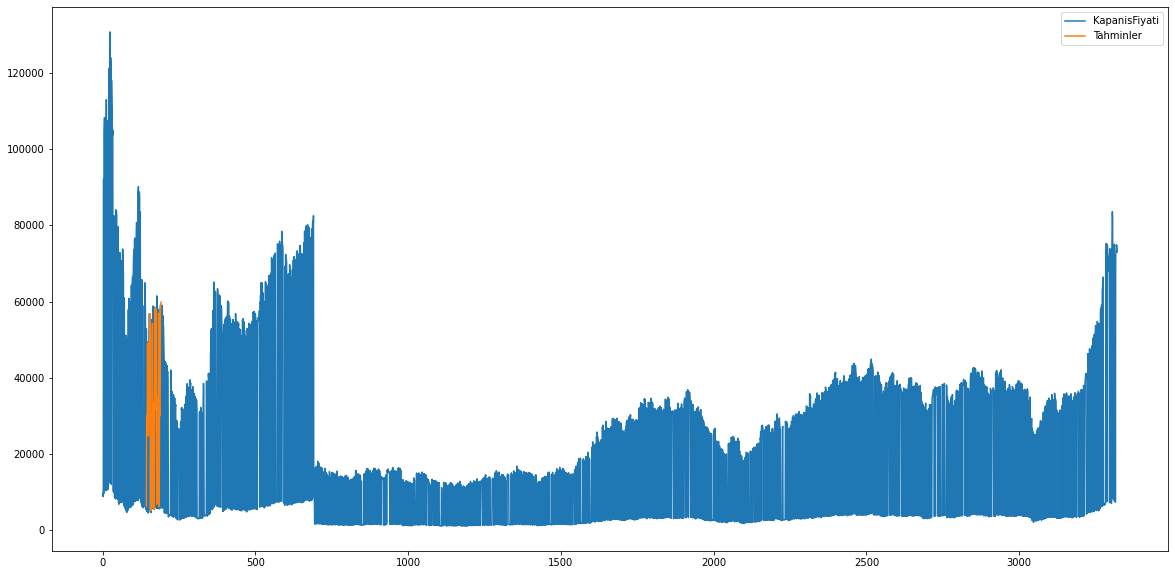

In [78]:
veriSeti2=pd.concat([veriSeti,veriSetiTahmin])
veriSeti2['Tahminler']=result.predict(start=143,end=191)
veriSeti2[['KapanisFiyati','Tahminler']].plot()